# __Neural Networks in Scikit-Learn and NumPy (Part A)__

<div class="alert alert-block alert-info">
<b>Note:</b> Scikit-Learn is not intended for use in large-scale Deep Learning projects...</div>

...It does, however, offer the required functionality to build simple DL models, such as the Multi-layer Perceptron (MLP), which we will use here. (An MLP has every node in one layer connected to every node in the next layer: it's **fully-connected**.)
Later we take this a step further with NumPy, in which more control over the architecture of the neural network is available, and training can become more complex.

We start with some general imports:

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

And then we generate some tricky data. We're using the function `make_moons` to generate some synthetic data that would be harder to classify with a simple classifier.

In [2]:
X, y = make_moons(n_samples = 500, noise = 0.2, random_state = 101)

Split the data into training and test sets.

In [3]:
# insert code here to split the data into 80:20 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

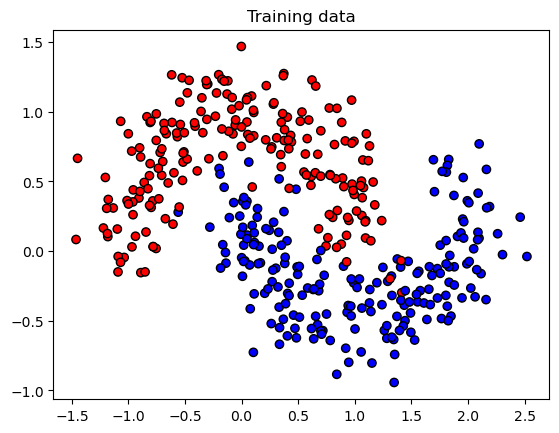

In [4]:
# visualise the training data
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train, edgecolors='k', cmap = cm_bright)
plt.title('Training data')
plt.show()

We will now attempt to build a neural network classifier that can accurately predict the classes data in this dataset.

Import the sklearn Classifier based on the MLP algorithm.

In [5]:
from sklearn.neural_network import MLPClassifier

We now want to train a neural network model, to classify red and blue points based on their coordinates, with the MLPClassifier.

A lot of the setup of the neural network is taken care of for us, and some things are fixed:
- there is no activation function for the output layer
- cross-entropy is used as the loss function
- we cannot use different activation functions or weight initialisers for different layers

Here we use an [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) solver. This is a little bit more complicated that using gradient descent, but the principle is similar: it's an interative procedure based on gradients.

In [6]:
alpha = 1e-5
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,2), random_state=1)
clf

MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

In [7]:
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

Now check the score (the mean accuracy of `self.predict(X)`).

In [8]:
clf.score(X_test,y_test)

0.99

In the cells below, get some details about the predictions the model can make.

Hint: type "clf." then double-hit <kbd>tab</kbd>

In [13]:
# insert code (one line) to predict the classes for the test set.


In [10]:
# insert code (one line) to list the classification probabilities for the test set.


__Have a play:__
- How does adjusting `alpha` affect the score?
- How does changing `hidden_layer_sizes` affect the score, or the training time? Note: we can use hidden layers as the total number of layer minus 2 (the input and output layers). `hidden_layer_sizes=(5, 2)` means there will be two hidden layers, the first with 5 units and the second with 2 units. Try one to three layers with 1 to 10 units per layer. How does this change things? Also look out for convergence warnings as the number of parameters increases.

__Visualise model boundaries__ _Note: this is not a prediction, but shows how the feature space is divided into classes._

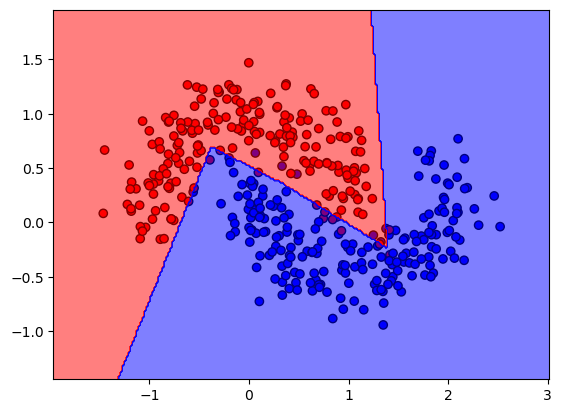

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train.ravel(), edgecolors='k', cmap = cm_bright)
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = 0.02 # step in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_binary = Z>=0.5
Z_binary = Z_binary.reshape(xx.shape)
ax.contourf(xx, yy, Z_binary, cmap=cm_bright, alpha=.5)
plt.show()

__Confusion Matrices__

In [15]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_test
#Complete the line below to produce a confusion matrix
#Hint: remember you can add a tab in Jupyter Lab to "Show Contextual Help"
cm = 
cm

array([[51,  0],
       [ 1, 48]])

Use a `seaborn` heatmap to visualise the confusion matrix.

In [ ]:
import seaborn as sn
# Insert code to calculate the accuracy, precision, recall and F1 score of the model.
accuracy  = 
precision = 
recall    = 
f1_score  = 
stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted' + stats_text)
plt.show()

__Move to Practical8b.ipynb__